# Anomaly Detecion Method 

  1. Linear Models for Anomaly Detection:<br/>
    1) OCSVM: One-Class Support Vector Machines

  2. Density-Based Anomaly Detection Models:<br/>
    1) LOF: Local Outlier Factor

  3. Ensemble-Based Anomaly Detection Models:<br/>
    1) Isolation Forest

  4. Density-Based Anomaly Detection Models: <br/>
    1) GMM: Gaussian Mixture Model 

  5. Model-Based Anomaly Detection Models :<br/> 
    1) Deep SVDD

## 라이브러리 불러오기

In [12]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import matplotlib.pyplot as plt
from celluloid import Camera

from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.auto_encoder import AutoEncoder 
from pyod.models.deep_svdd import DeepSVDD 
from pyod.models.gmm import GMM 
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score


### 사용할 데이터셋

In [18]:
# Define data file and read X and y
mat_file_list = ['arrhythmia.mat',
                 'cardio.mat',
                 'glass.mat',
                 'ionosphere.mat',
                 'letter.mat',
                 'lympho.mat',
                 'mnist.mat',
                 'musk.mat',
                 'optdigits.mat',
                 'pendigits.mat',
                 'pima.mat',
                 'satellite.mat',
                 'satimage-2.mat',
                 'shuttle.mat',
                 'vertebral.mat',
                 'vowels.mat',
                 'wbc.mat']

# Define nine outlier detection tools to be compared
random_state = np.random.RandomState(42)

df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
              'OCSVM', 'LOF', 'IForest', 'GMM', 'DeepSVDD']

roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)

## 데이터 EDA 

In [42]:
def plot_sensor(mat) :
    X = mat['X']
    y = mat['y'].ravel()
    fig = plt.figure(figsize=(16,6))

    camera= Camera(fig)
    ax = fig.add_subplot(111)

    ## 불량 구간 탐색 데이터
    labels = y

    for i in range(X.shape[1]):
        plt.plot(X[:,i]) 

    # 고장구간 표시 
    for j in range(X.shape[0]):
        if y[j] == 1 : 
            plt.vlines(j,-200,500,color='r',linestyles='solid',linewidth=2)

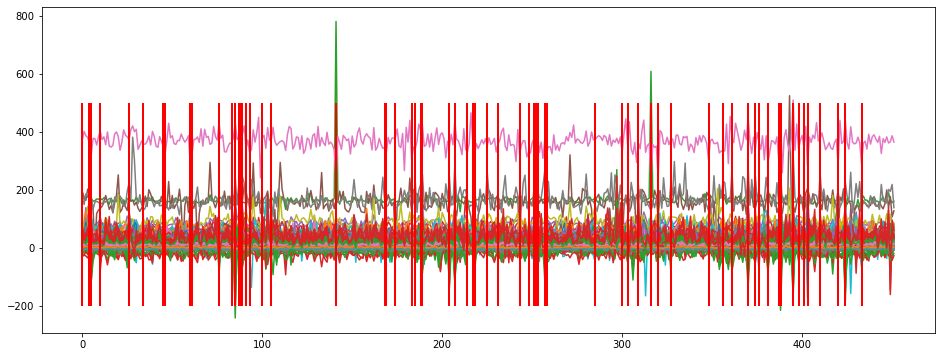

In [40]:
# arrhythmia 데이터셋 

mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+ 'arrhythmia.mat')

plot_sensor(mat)

In [49]:
def plot_sensor(mat) :
    X = mat['X']
    y = mat['y'].ravel()
    fig = plt.figure(figsize=(16,6))

    camera= Camera(fig)
    ax = fig.add_subplot(111)

    ## 불량 구간 탐색 데이터
    labels = y

    for i in range(X.shape[1]):
        plt.plot(X[:,i]) 

    # 고장구간 표시 
    for j in range(X.shape[0]):
        if y[j] == 1 : 
            plt.vlines(j,-5,10,color='r',linestyles='solid',linewidth=0.5)

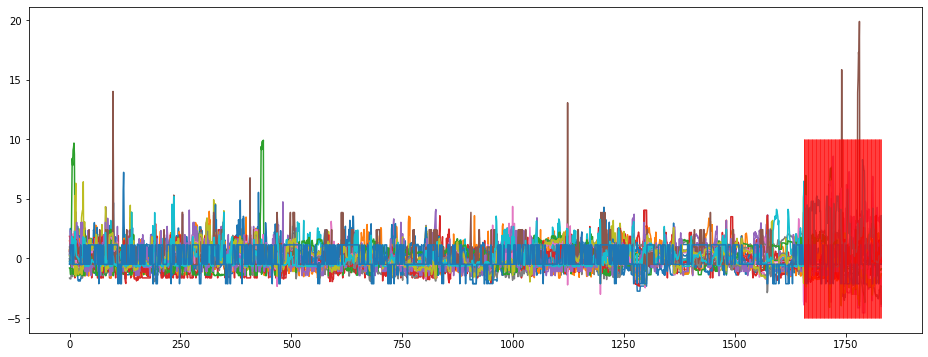

In [50]:
# cardio 데이터셋 

mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+ 'cardio.mat')

plot_sensor(mat)

In [55]:
def plot_sensor(mat) :
    X = mat['X']
    y = mat['y'].ravel()
    fig = plt.figure(figsize=(16,6))

    camera= Camera(fig)
    ax = fig.add_subplot(111)

    ## 불량 구간 탐색 데이터
    labels = y

    for i in range(X.shape[1]):
        plt.plot(X[:,i]) 

    # 고장구간 표시 
    for j in range(X.shape[0]):
        if y[j] == 1 : 
            plt.vlines(j,-20,150,color='r',linestyles='solid',linewidth=1)

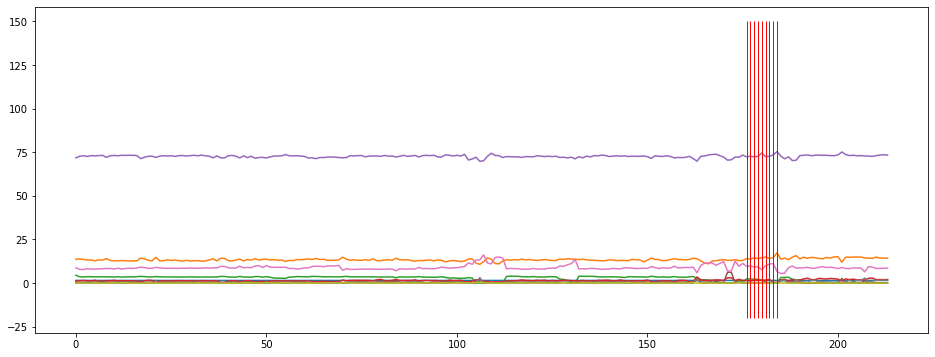

In [56]:
# glass 데이터셋 

mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+ 'glass.mat')

plot_sensor(mat)

In [61]:
def plot_sensor(mat) :
    X = mat['X']
    y = mat['y'].ravel()
    fig = plt.figure(figsize=(16,6))

    camera= Camera(fig)
    ax = fig.add_subplot(111)

    ## 불량 구간 탐색 데이터
    labels = y

    for i in range(X.shape[1]):
        plt.plot(X[:,i]) 

    # 고장구간 표시 
    for j in range(X.shape[0]):
        if y[j] == 1 : 
            plt.vlines(j,-2,2,color='r',linestyles='solid',linewidth=1)

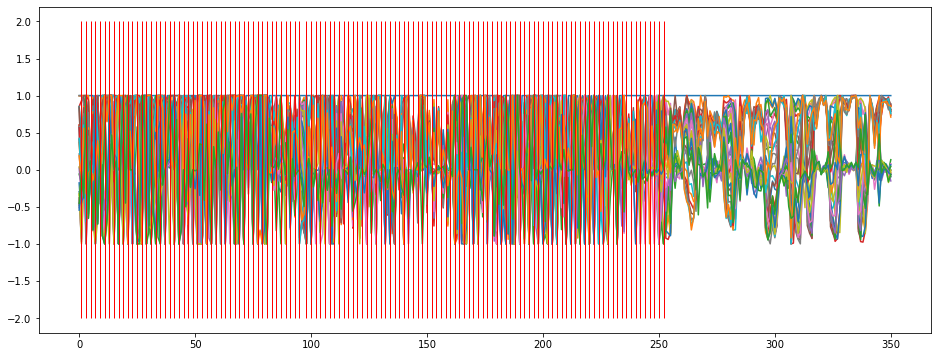

In [62]:
# ionosphere 데이터셋 

mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+ 'ionosphere.mat')

plot_sensor(mat)

In [69]:
def plot_sensor(mat) :
    X = mat['X']
    y = mat['y'].ravel()
    fig = plt.figure(figsize=(16,6))

    camera= Camera(fig)
    ax = fig.add_subplot(111)

    ## 불량 구간 탐색 데이터
    labels = y

    for i in range(X.shape[1]):
        plt.plot(X[:,i]) 

    # 고장구간 표시 
    for j in range(X.shape[0]):
        if y[j] == 1 : 
            plt.vlines(j,-10,20,color='r',linestyles='solid',linewidth=1)

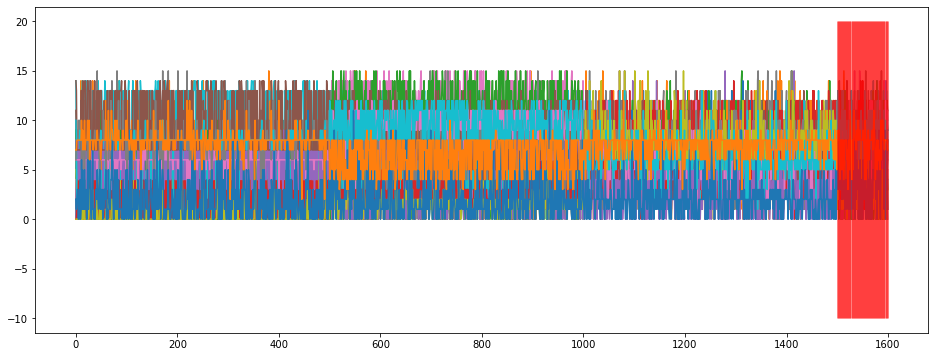

In [67]:
# letter 데이터셋 

mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+ 'letter.mat')

plot_sensor(mat)

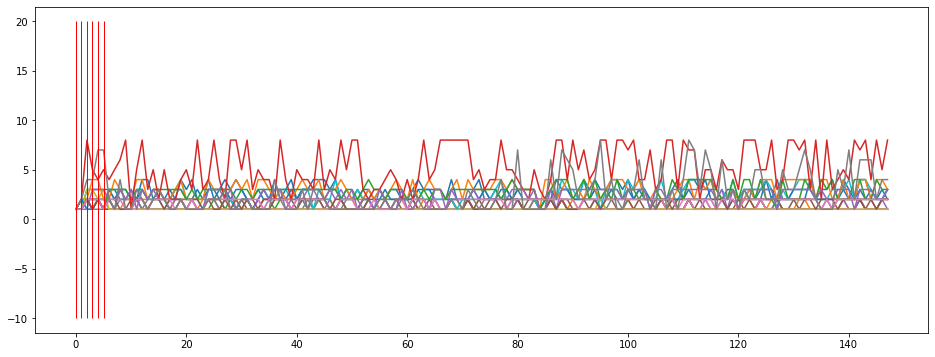

In [70]:
# lympho 데이터셋 

mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+ 'lympho.mat')

plot_sensor(mat)

## 모델 학습 

In [19]:
for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat('C:/Users/JiwonMoon/Desktop/대학원수업/비즈니스 어낼리틱스/pyod-master/notebooks/data/'+mat_file)

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    # 모델 : OCSVM, LOF, IForest, GMM, DeepSVDD 사용 
    classifiers = {
        'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),

        'Local Outlier Factor (LOF)': LOF(
            contamination=outliers_fraction),

        'Isolation Forest': IForest(contamination=outliers_fraction,
                                    random_state=random_state),
        
        'GMM' : GMM(contamination=outliers_fraction),

        'DeepSVDD' : DeepSVDD(use_ae = False, epochs = 5, contamination=0.1, random_state=10)

    }

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train_norm)
        test_scores = clf.decision_function(X_test_norm)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        time_list.append(duration)

        roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
        prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

        print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
              'execution time: {duration}s'.format(
            clf_name=clf_name, roc=roc, prn=prn, duration=duration))

        roc_list.append(roc)
        prn_list.append(prn)

    temp_df = pd.DataFrame(time_list).transpose()
    temp_df.columns = df_columns
    time_df = pd.concat([time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing arrhythmia.mat ...
One-class SVM (OCSVM) ROC:0.7986, precision @ rank n:0.5, execution time: 0.0091s
Local Outlier Factor (LOF) ROC:0.7787, precision @ rank n:0.4643, execution time: 0.003s
Isolation Forest ROC:0.8464, precision @ rank n:0.5714, execution time: 0.1505s
GMM ROC:0.8011, precision @ rank n:0.3571, execution time: 0.0678s
9/9 [==============================] - 0s 732us/step
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 274)]             0         
                                                                 
 dense_19 (Dense)            (None, 64)                17536     
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 32)         

## 결과

In [20]:
print('Time complexity')
time_df

Time complexity


,Data,#Samples,# Dimensions,Outlier Perc,OCSVM,LOF,IForest,GMM,DeepSVDD
0,arrhythmia,452,274,14.6018,0.0091,0.003,0.1505,0.0678,0.8949
0,cardio,1831,21,9.6122,0.0638,0.0259,0.1475,0.0404,1.1497
0,glass,214,9,4.2056,0.001,0.003,0.0978,0.0289,0.707
0,ionosphere,351,33,35.8974,0.004,0.002,0.1076,0.0289,0.9202
0,letter,1600,32,6.25,0.0488,0.0209,0.154,0.0319,1.0595
0,lympho,148,18,4.0541,0.001,0.001,0.0937,0.0269,0.6958
0,mnist,7603,100,9.2069,1.3667,0.4057,0.7375,0.0688,2.2194
0,musk,3062,166,3.1679,0.2761,0.0718,0.4635,0.0703,1.5459
0,optdigits,5216,64,2.8758,0.5561,0.2053,0.3807,0.0568,1.7335
0,pendigits,6870,16,2.2707,0.8094,0.3359,0.312,0.0558,2.1702


🔎 결과 해석 : <br/>
Time complexity 측면에서는 LOF가 전체적으로 거의 모든 데이터에 대해서 타 모델 대비 우수하다는 것을 확인할 수 있었다. 

In [21]:
print('ROC Performance')
roc_df

ROC Performance


,Data,#Samples,# Dimensions,Outlier Perc,OCSVM,LOF,IForest,GMM,DeepSVDD
0,arrhythmia,452,274,14.6018,0.7986,0.7787,0.8464,0.8011,0.7192
0,cardio,1831,21,9.6122,0.9256,0.5309,0.9084,0.882,0.5742
0,glass,214,9,4.2056,0.7432,0.7753,0.721,0.7037,0.7432
0,ionosphere,351,33,35.8974,0.8442,0.9078,0.842,0.9381,0.8643
0,letter,1600,32,6.25,0.604,0.8478,0.6218,0.8226,0.6734
0,lympho,148,18,4.0541,0.9825,0.9708,0.9883,0.9357,1.0
0,mnist,7603,100,9.2069,0.8591,0.7022,0.8039,0.8522,0.736
0,musk,3062,166,3.1679,1.0,0.6598,1.0,0.9966,0.8409
0,optdigits,5216,64,2.8758,0.4821,0.5358,0.7423,0.4526,0.3932
0,pendigits,6870,16,2.2707,0.9296,0.5641,0.9479,0.7761,0.6828


🔎 결과해석 : <br/>
AUC Score을 비고한 결과, Isolation Forest가 우수한 성능을 보임을 확인할 수 있었다. 또한 이상치의 비율이 상당히 낮은 데이터(satimage-2)에 대해서도 높은 AUC score를 보임을 확인할 수 있다. 또한 위의 표에서 시간 복잡도 측면에서도 Isolation Forest의 결과가 우수했기에 이상을 탐지하는 데 있어 Isolation Forest가 성능이 우수함을 증명했다. 